In [1]:
import time
import random
import math
import matplotlib.pyplot as plt
from util import City, read_cities, write_cities_and_return_them, generate_cities, path_cost

In [3]:
class Particle:
    def __init__(self, route, cost=None):
        self.route = route
        self.pbest = route
        self.current_cost = cost if cost else self.path_cost()
        self.pbest_cost = cost if cost else self.path_cost()
        self.velocity = []

    def clear_velocity(self):
        self.velocity.clear()

    def update_costs_and_pbest(self):
        self.current_cost = self.path_cost()
        if self.current_cost < self.pbest_cost:
            self.pbest = self.route
            self.pbest_cost = self.current_cost

    def path_cost(self):
        return path_cost(self.route)


class PSO:

    def __init__(self, iterations, population_size, gbest_probability=1.0, pbest_probability=1.0, cities=None):
        self.cities = cities
        self.gbest = None
        self.gcost_iter = []
        self.iterations = iterations
        self.population_size = population_size
        self.particles = []
        self.gbest_probability = gbest_probability
        self.pbest_probability = pbest_probability

        solutions = self.initial_population()
        self.particles = [Particle(route=solution) for solution in solutions]

    def random_route(self):
        return random.sample(self.cities, len(self.cities))

    def initial_population(self):
        random_population = [self.random_route() for _ in range(self.population_size - 1)]
        greedy_population = [self.greedy_route(0)]
        return [*random_population, *greedy_population]
        # return [*random_population]

    def greedy_route(self, start_index):
        unvisited = self.cities[:]
        del unvisited[start_index]
        route = [self.cities[start_index]]
        while len(unvisited):
            index, nearest_city = min(enumerate(unvisited), key=lambda item: item[1].distance(route[-1]))
            route.append(nearest_city)
            del unvisited[index]
        return route

    def run(self):
        self.gbest = min(self.particles, key=lambda p: p.pbest_cost)
        print(f"initial cost is {self.gbest.pbest_cost}")
        plt.ion()
        plt.draw()
        for t in range(self.iterations):
            self.gbest = min(self.particles, key=lambda p: p.pbest_cost)
            if t % 20 == 0:
                plt.figure(0)
                plt.plot(pso.gcost_iter, 'g')
                plt.ylabel('Distance')
                plt.xlabel('Generation')
                fig = plt.figure(0)
                fig.suptitle('pso iter')
                x_list, y_list = [], []
                for city in self.gbest.pbest:
                    x_list.append(city.x)
                    y_list.append(city.y)
                x_list.append(pso.gbest.pbest[0].x)
                y_list.append(pso.gbest.pbest[0].y)
                fig = plt.figure(1)
                fig.clear()
                fig.suptitle(f'pso TSP iter {t}')

                plt.plot(x_list, y_list, 'ro')
                plt.plot(x_list, y_list, 'g')
                plt.draw()
                plt.pause(.001)
            self.gcost_iter.append(self.gbest.pbest_cost)

            for particle in self.particles:
                particle.clear_velocity()
                temp_velocity = []
                gbest = self.gbest.pbest[:]
                new_route = particle.route[:]

                for i in range(len(self.cities)):
                    if new_route[i] != particle.pbest[i]:
                        swap = (i, particle.pbest.index(new_route[i]), self.pbest_probability)
                        temp_velocity.append(swap)
                        new_route[swap[0]], new_route[swap[1]] = \
                            new_route[swap[1]], new_route[swap[0]]

                for i in range(len(self.cities)):
                    if new_route[i] != gbest[i]:
                        swap = (i, gbest.index(new_route[i]), self.gbest_probability)
                        temp_velocity.append(swap)
                        gbest[swap[0]], gbest[swap[1]] = gbest[swap[1]], gbest[swap[0]]

                particle.velocity = temp_velocity

                for swap in temp_velocity:
                    if random.random() <= swap[2]:
                        new_route[swap[0]], new_route[swap[1]] = \
                            new_route[swap[1]], new_route[swap[0]]

                particle.route = new_route
                particle.update_costs_and_pbest()

Started at 1686408849.301831
initial cost is 62176.401032322225


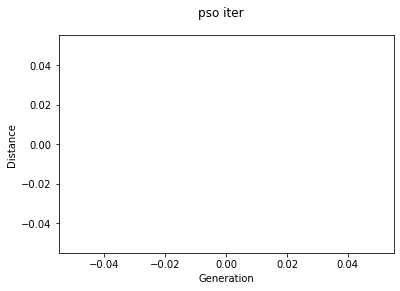

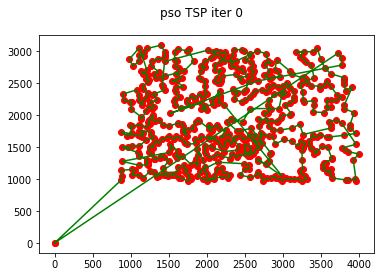

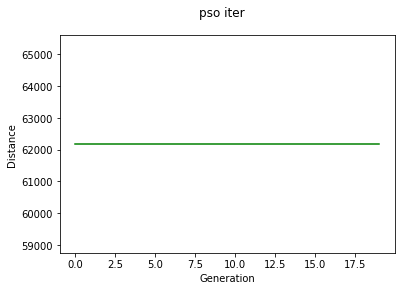

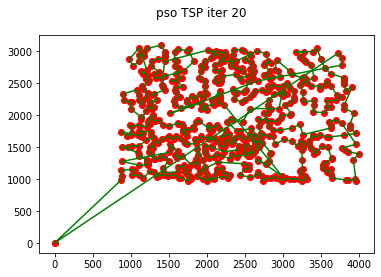

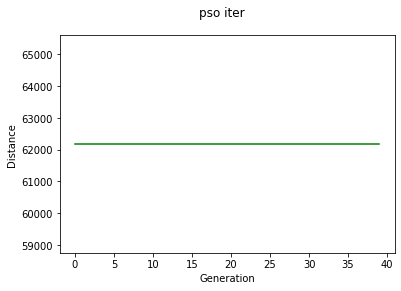

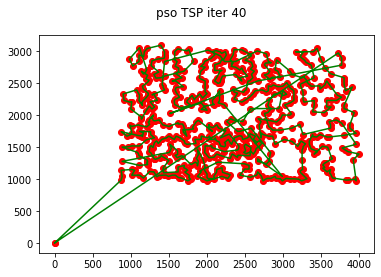

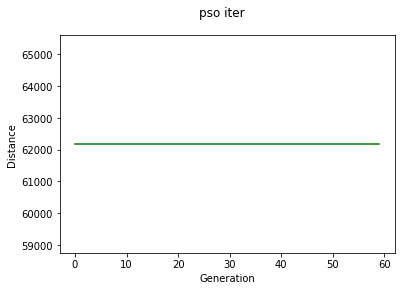

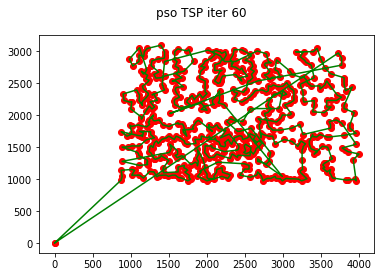

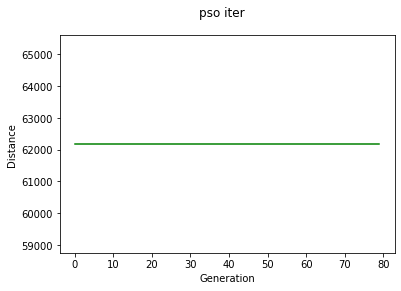

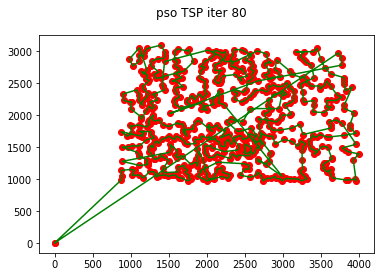

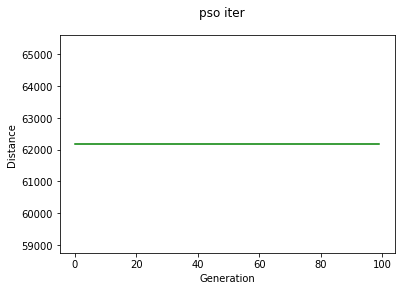

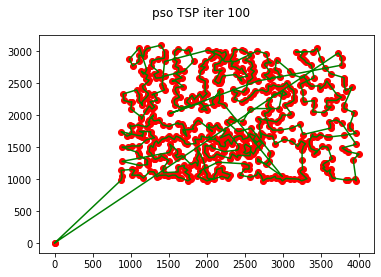

KeyboardInterrupt: 

In [4]:
cities = read_cities(657)
pso = PSO(iterations=2000, population_size=500, pbest_probability=0.9, gbest_probability=0.01, cities=cities)

start = time.time()
print("Started at", start)

pso.run()

end = time.time()
print("Ended at", end)
print("Interval is", round(end-start,3))

print(f'cost: {pso.gbest.pbest_cost}\t| gbest: {pso.gbest.pbest}')
print("Iteration:", pso.iterations)

In [ ]:
x_list, y_list = [], []
for city in pso.gbest.pbest:
    x_list.append(city.x)
    y_list.append(city.y)
x_list.append(pso.gbest.pbest[0].x)
y_list.append(pso.gbest.pbest[0].y)
fig = plt.figure(1)
fig.suptitle('pso TSP')

plt.plot(x_list, y_list, 'ro')
plt.plot(x_list, y_list)
plt.show(block=True)